### Understanding Neural Networks
David Kahn <br>
12/16/2016 <br>
<br>
<br>
Code written and provided by Andrew Gladden
<br>
<br>


Neural networks can be used to complete tasks that humans think are simple, but computers would not be able to brute force. In the case of my understanding of them, I am limited. A Neural network consists of input neurons, a middle layer formed from more neurons, and output neurons. The input neurons take in the data and pass it through synapses to each subsequent neuron. From there more synapses connect either another middle layer to the prior one or the output to the middle layer. Through the use of matrices and a small amount of complicated math, we are able to create a neural network that 'learns' from a dataset and is able to predict an outcome. 

In order to create a Neural Network, we will place the data into matrices. This data is then passed into a neural Network class that uses a method called forward to cary the inputs through the network. Within this, two methods, sigmoid and sigmoid prime, are used to weight the synapse connections. These weights act as a way for the computer to understand how 'important' each synapse connection is as well as to apply a calculation to each piece of data by applying the sigmoid activation function. The synapse connections are connections that form between each layer of the network and its prior layer in order to allow the data to be understood through multiple methods. The weights, carried by the forward function, are then passed through a cost function to determine which weight (applied to each synapse) is the most accurate. To do this, we take the derivative of the data in order to get a slope value, this slope is compared to others to ensure that it is the smallest, and thus the most accurate. Through the cost function, we are able to minimize the inaccuracy of the weights applied. From here, a calculation gradient is used to stop the program from looping and reaching a local low. This is useful to ensure that the program is optimized.

After these steps, the program uses the Getparams and Setparams methods to, as they describe, set the parameters and get the parameters for each optimization of the data. As a further optimization, we then use another gradient to check our previous calculations, just to ensure that we have the most accurate answer. 

Finally, we use a trainer to train the network with a dataset so we can then start predicting. The trainer simply puts a dataset into the network with known answers so the network can determine how accurate it is and therefore become the most optimized it can for that set of data. From here the trained network can predict answers for information that we pass into it.

In [1]:
import sklearn
import numpy as np
from numpy.linalg import norm#Linear algorithm vector normalization
from scipy import optimize#OPTIMIZE DAT SHET
import matplotlib.pyplot as plot
%matplotlib inline

#Supervised regression method, sup = inp & out, reg = predic of num
X = np.array(([3, 5], [5, 1], [10, 2]), dtype=float);#[hrs sleep, hrs study]
y = np.array(([75], [82], [93]), dtype=float);#[score]

print(X);
print(y);

#Need to account for unit diff. Inp is in hrs, out is in grade num
#Will scale data
#Data is positive, so will divide by max val of each var
X = X/np.amax(X, axis = 0);#Compare to the highest number available
y = y/100;#We know that highest score possible is 100
#This network must follow the format of two inputs one output
print(X);
print(y);
#In between the inp and out is a hidden network, consisting of neurons
"""Things that connect neurons are synapses,
    synapses take input values, and multiply them by a weight before
    passing them on. Neurons also take multiple inputs, from
    all their synapses, and apply an activation function."""
print();

[[  3.   5.]
 [  5.   1.]
 [ 10.   2.]]
[[ 75.]
 [ 82.]
 [ 93.]]
[[ 0.3  1. ]
 [ 0.5  0.2]
 [ 1.   0.4]]
[[ 0.75]
 [ 0.82]
 [ 0.93]]



In [2]:
#building NN as a class
class Neural_Network(object):#Make class
    def __init__(self):#Init method
        #use self."variable" to make it class accessible
        #Define HyperParameters
        self.inputLayerDepth = 2;#Two inputs
        self.outputLayerDepth = 1;#One output
        self.hiddenLayerDepth = 3;#Three neurons to calculate with
        
        #Weights (Parameters)
        self.W1 = np.random.randn(self.inputLayerDepth, \
                                self.hiddenLayerDepth);
        self.W2 = np.random.randn(self.hiddenLayerDepth, \
                                 self.outputLayerDepth);
    
    def forward(self, X):#Use matrices to input multiple vals at once
        #Propogate inputs through network
        #Matrix multiplication to speed things up
        #Input matrix = X, weight matrix = w(1), out matrix = Z(2)
        #Z(2) is 3 by 3, one row per example, one col per hidden unit
        #Func: Z(2) = Xw(1)
        #a(2) = f(z(2))
        self.z2 = np.dot(X, self.W1);
        self.a2 = self.sigmoid(self.z2);
        self.z3 = np.dot(self.a2, self.W2);
        yHat = self.sigmoid(self.z3);
        return yHat
    
    def sigmoid(self, z):
        #Apply sigmoid activation function
        return 1/(1+np.exp(-z));
    
    def sigmoidPrime(self, z):#Derivation of the Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2);
    
    def cFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def cFPrime(self, X, y):#Get derivs with context of W1 and W2
        self.yHat = self.forward(X);
        
        #Delta of z3 data calc
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3));
        dW2 = np.dot(self.a2.T, delta3);
        
        #Delta of z2 data calc, among everything else I think
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2);
        dW1 = np.dot(X.T, delta2);
        
        return dW1, dW2;
    
    def getParams(self):
        #GET W1 and W2 rolled into a vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()));
        return params;
    
    def setParams(self, params):
        #SET W1 and W2 using a single parameter vector:
        W1_start = 0;
        W1_end = self.hiddenLayerDepth*self.inputLayerDepth;
        self.W1 = np.reshape(params[W1_start:W1_end], \
                            (self.inputLayerDepth, self.hiddenLayerDepth));
        W2_end = W1_end+self.hiddenLayerDepth*self.outputLayerDepth;
        self.W2 = np.reshape(params[W1_end:W2_end], \
                            (self.hiddenLayerDepth, self.outputLayerDepth));
        
    def calcGradients(self, X, y):
        dW1, dW2 = self.cFPrime(X, y);
        return np.concatenate((dW1.ravel(), dW2.ravel()));
    
    

NN = Neural_Network();
yHat = NN.forward(X);
cost1 = NN.cFunction(X, y);
dW1, dW2 = NN.cFPrime(X, y);
print(yHat);
print("Really bad prediction",y);
print();
print("1:", dW1);
print("2:", dW2);

[[ 0.69663014]
 [ 0.71568632]
 [ 0.75033005]]
Really bad prediction [[ 0.75]
 [ 0.82]
 [ 0.93]]

1: [[-0.00503776  0.00183196 -0.00611232]
 [-0.00398105  0.0011008  -0.00383997]]
2: [[-0.05365565]
 [-0.04383536]
 [-0.04425713]]


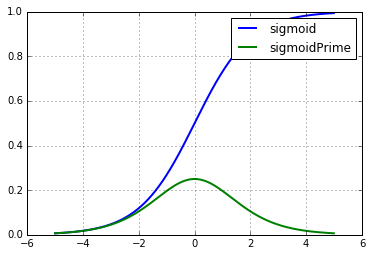

In [3]:
tValues = np.arange(-5, 5, 0.01);
plot.plot(tValues, NN.sigmoid(tValues), linewidth = 2);
plot.plot(tValues, NN.sigmoidPrime(tValues), linewidth = 2);
plot.grid(1);
plot.legend(['sigmoid', 'sigmoidPrime']);

In [4]:
scalar = 3;
NN.W1 = NN.W1+scalar+dW1;
NN.W2 = NN.W2+scalar+dW2;
cost2 = NN.cFunction(X, y);

In [5]:
print(cost1, cost2);

[ 0.02300549] [ 0.04987358]


In [6]:
dW1, dW2 = NN.cFPrime(X, y);
NN.W1 = NN.W1-scalar+dW1;
NN.W2 = NN.W2-scalar+dW2;
cost3 = NN.cFunction(X, y);

In [7]:
print(cost2, cost3);

[ 0.04987358] [ 0.03065339]


In [8]:
x = np.arange(-5, 5, 0.01);

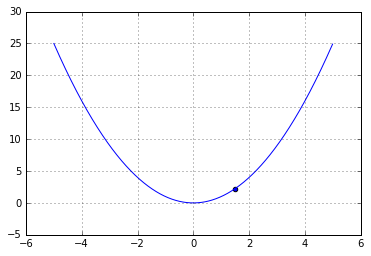

In [9]:
plot.plot(x, x**2, 'b');
plot.grid(1);
plot.scatter(1.5, 1.5**2);

In [10]:
def f(x):
    return x**2;

In [11]:
epsilon = 1e-4;
x = 1.5;

In [12]:
numericGradient = (f(x+epsilon)-f(x-epsilon))/(2*epsilon);

In [13]:
numericGradient, 2*x

(2.9999999999996696, 3.0)

In [14]:
def cNGradient(N, X, y):
    paramsInitial = N.getParams();
    numgrad = np.zeros(paramsInitial.shape);
    perturb = np.zeros(paramsInitial.shape);
    e = 1e-4;
    
    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e;
        N.setParams(paramsInitial+perturb);
        loss2 = N.cFunction(X, y);
        
        N.setParams(paramsInitial-perturb);
        loss1 = N.cFunction(X, y);
        
        #Compute slope between the values:
        numgrad[p] = (loss2-loss1)/(2*e);
        
        #Return the value changed back to zero:
        perturb[p] = 0;
        
    #Return parameters to original values:
    N.setParams(paramsInitial);
    return numgrad;
        

In [15]:
print(NN.getParams());

[ 2.21438062  0.53990493  0.80676857 -0.0299187   0.66912832  0.28381442
  0.82255427 -0.21912511  0.558624  ]


In [16]:
numgrad = cNGradient(NN, X, y);

In [17]:
grad = NN.calcGradients(X, y);

In [18]:
numgrad

array([-0.0058558 ,  0.00277326, -0.00689662, -0.00499418,  0.00176868,
       -0.00461562, -0.06606529, -0.0544987 , -0.05468526])

In [19]:
grad

array([-0.0058558 ,  0.00277326, -0.00689662, -0.00499418,  0.00176868,
       -0.00461562, -0.06606529, -0.0544987 , -0.05468526])

In [20]:
norm(grad-numgrad)/norm(grad+numgrad)

7.0471772339025082e-10

In [21]:
class trainer(object):
    def __init__(self, N):
        #Scope out to see NN
        self.N = N;
        
    def cFWrapper(self, params, X, y):#Wrap values
        self.N.setParams(params);
        cost = self.N.cFunction(X, y);
        grad = self.N.calcGradients(X, y);
        return cost, grad;
    
    def cbF(self, params):
        self.N.setParams(params);
        self.J.append(self.N.cFunction(self.X, self.y));
        
    
    def train(self, X, y):
        
        #Making internal variable for callback func
        self.X = X;
        self.y = y;
        #Now store the costs:
        self.J = [];
        
        params0 = self.N.getParams();
        
        options = {'maxiter': 200, 'disp': True};
        _res = optimize.minimize(self.cFWrapper, params0, \
                                 jac = True, method='BFGS', \
                                 args = (X, y), options = options, \
                                 callback = self.cbF);
        #Replace random parameters with trained parameters
        self.N.setParams(_res.x);
        self.optResults = _res;

In [22]:
T = trainer(NN);

In [23]:
T.train(X, y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 57
         Function evaluations: 67
         Gradient evaluations: 67


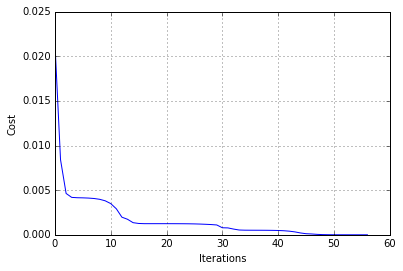

In [24]:
plot.plot(T.J);
plot.grid(1);
plot.ylabel('Cost');
plot.xlabel('Iterations');

In [25]:
NN.cFPrime(X, y)

(array([[  4.64649193e-07,   1.16784949e-06,  -3.57746587e-09],
        [  1.83115581e-06,  -1.83625769e-06,  -5.22697323e-09]]),
 array([[ -3.11496035e-06],
        [  6.07249339e-07],
        [ -2.25160006e-06]]))

In [26]:
NN.forward(X)

array([[ 0.75001595],
       [ 0.82001623],
       [ 0.92988367]])

In [27]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [28]:
#Test network for combos
hoursSleep = np.linspace(0, 10, 100);
hoursStudy = np.linspace(0, 5, 100);
#print(hoursSleep, "\n\n\n", hoursStudy);
#print();
#Normalizing data:
hoursSleepNorm = hoursSleep/10.;
hoursStudyNorm = hoursStudy/5.

#Flatten Data:
a, b = np.meshgrid(hoursSleepNorm, hoursStudyNorm);

#Put it in the Matrix
allInputs = np.zeros((a.size, 2));
allInputs[:, 0] = a.ravel();
allInputs[:, 1] = b.ravel();

In [29]:
allOut = NN.forward(allInputs);
print(allOut);

[[ 0.30067003]
 [ 0.31198929]
 [ 0.32353357]
 ..., 
 [ 0.93523946]
 [ 0.93582315]
 [ 0.93638828]]


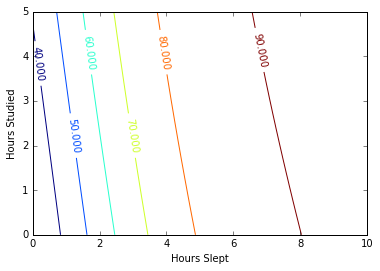

In [30]:
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
yy = np.dot(hoursStudy.reshape(100, 1), np.ones((1, 100)));
xx = np.dot(hoursSleep.reshape(100, 1), np.ones((1, 100))).T;

CS = plot.contour(xx, yy, 100*allOut.reshape(100, 100));
plot.clabel(CS, inline = 1, fontsize = 10);
plot.xlabel("Hours Slept");
plot.ylabel("Hours Studied");

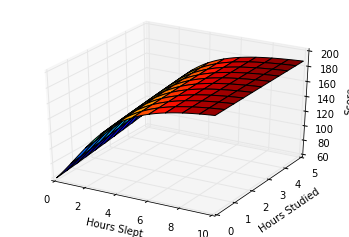

In [31]:
#3D plot whoaaaaaa~

from mpl_toolkits.mplot3d import Axes3D
fig = plot.figure(1)
ax = fig.gca(projection = '3d')
surg = ax.plot_surface(xx, yy, 200*allOut.reshape(100, 100), \
                       cmap = cm.jet)

ax.set_xlabel('Hours Slept')
ax.set_ylabel("Hours Studied")
ax.set_zlabel("Score")